In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    # Load data from the dataset, skipping the header
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # Extract individual columns for features
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    
    # Extract target variable (sales)
    sales_data = get_column(data, 3)
    
    # Build X (input) and y (output) for training
    X = [[1, tv, radio, newspaper] for tv, radio, newspaper in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data

    return X, y

def initialize_params():
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

In [3]:
def predict(X_features, weights):
    X_features = np.array(X_features)
    weights = np.array(weights)
    result = np.dot(X_features, weights)
    return result

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# Compute gradient
def compute_gradient_w(X_features, y, y_hat):
    dl_dw1 = 2*X_features[1]*(y_hat-y)
    dl_dw2 = 2*X_features[2]*(y_hat-y)
    dl_dw3 = 2*X_features[3]*(y_hat-y)
    dl_db = 2*(y_hat-y)
    
    dl_dweights = [dl_db, dl_dw1, dl_dw2, dl_dw3]
    return dl_dweights

# Update weights
def update_weight(weights, dl_dweights, lr):
    b, w1, w2, w3 = weights
    dl_db, dl_w1, dl_w2, dl_w3 = dl_dweights 
    b = b - lr*dl_db
    w1 = w1 - lr*dl_w1
    w2 = w2 - lr*dl_w2
    w3 = w3 - lr*dl_w3
    weights = [b, w1, w2, w3]
    return weights

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49


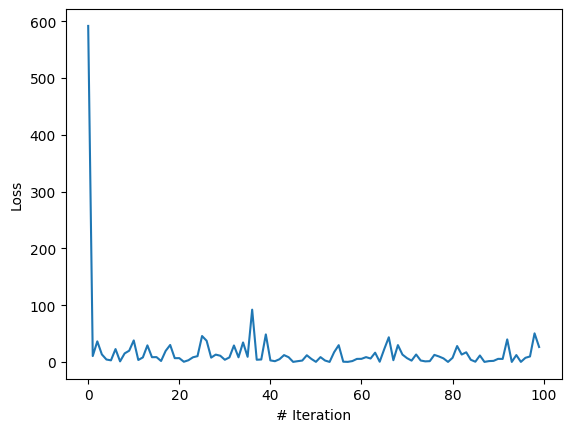

In [4]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)

    for epoch in range(epoch_max):
        print("Epoch:", epoch)
        for i in range(N):
            # Get a sample - row i
            features_i = X_feature[i]
            y = y_output[i]

            # Compute output
            y_hat = predict(features_i, weights)

            # Compute loss
            loss = compute_loss(y, y_hat)

            # Compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # Update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # Logging
            losses.append(loss)

    return weights, losses

# Prepare data and implement linear regression
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y)


# Plot loss
plt.plot(L[:100])
plt.xlabel("# Iteration")
plt.ylabel("Loss")
plt.show()

In [5]:
print(L[9999])

31.339223408109948
